Pratiwi Fitriana Haris<br>
Kelas Belajar Machine Learning untuk Pemula - Dicoding

In [1]:
# import beberapa library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# mengecek versi tensorflow
print(tf.__version__)

2.3.0


In [3]:
# download dataset rockpaperscissors
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-04 05:33:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.5MB/s    in 31s     

2020-11-04 05:34:17 (9.86 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakkukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# mengecek file pada direktori
print("Isi direktori: ", os.listdir('/tmp/rockpaperscissors'))
jmlrock = len(os.listdir('/tmp/rockpaperscissors/rock'))
jmlpaper = len(os.listdir('/tmp/rockpaperscissors/paper'))
jmlsci = len(os.listdir('/tmp/rockpaperscissors/scissors'))
print("Jumlah gambar rock: ", jmlrock)
print("Jumlah gambar paper: ", jmlpaper)
print("Jumlah gambar scissors: ", jmlsci)

Isi direktori:  ['rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']
Jumlah gambar rock:  726
Jumlah gambar paper:  712
Jumlah gambar scissors:  750


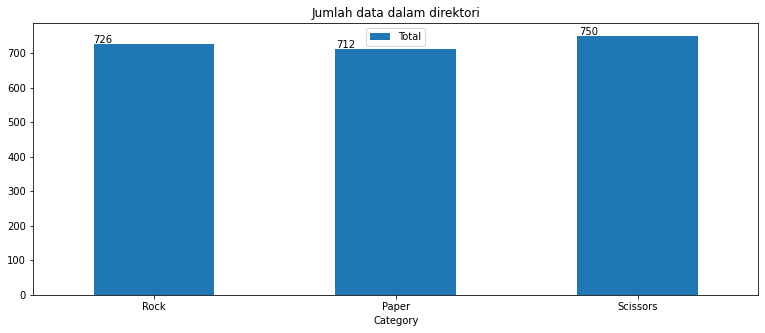

In [6]:
# visualisasi jumlah data dalam direktori
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = pd.DataFrame({'Category': ['Rock', 'Paper', 'Scissors'], 'Total': [jmlrock, jmlpaper, jmlsci]})
ax = data_dir.plot.bar(x='Category', y='Total', rot=0, figsize=(13, 5))
plt.title('Jumlah data dalam direktori')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [7]:
# menentukan nama direktori untuk training data dan validation data
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
# membuat direktori untuk data training dan data validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [9]:
# menentukan direktori untuk tiap kategori gambar (rock, paper, dan scissors)
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [10]:
# membagi data training dan data validation menggunakan library sklearn dengan test_size 0.2
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [11]:
# menentukan direktori training data untuk setiap kategori (kelas)
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

In [12]:
# menentukan direktori validation data untuk setiap kategori (kelas)
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [13]:
# membuat direktori baru untuk data training untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(train_rock))
os.mkdir(os.path.join(train_paper))
os.mkdir(os.path.join(train_scissors))

In [14]:
# membuat direktori baru untuk data validation untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(val_rock))
os.mkdir(os.path.join(val_paper))
os.mkdir(os.path.join(val_scissors))

In [15]:
# meng-copy data training ke dalam direktori baru menggunakan library shutil
import shutil
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

In [16]:
# meng-copy data testing ke dalam direktori baru menggunakan library shutil
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [17]:
# mengecek jumlah data training
jmltrainrock = len(os.listdir('/tmp/rockpaperscissors/train/rock'))
jmltrainpaper = len(os.listdir('/tmp/rockpaperscissors/train/paper'))
jmltrainsci = len(os.listdir('/tmp/rockpaperscissors/train/scissors'))
print("Jumlah data training kategori rock: ", jmltrainrock)
print("Jumlah data training kategori paper: ", jmltrainpaper)
print("Jumlah data training kategori scissors: ", jmltrainsci)

Jumlah data training kategori rock:  580
Jumlah data training kategori paper:  569
Jumlah data training kategori scissors:  600


In [18]:
# mengecek jumlah data validation
jmlvalrock = len(os.listdir('/tmp/rockpaperscissors/val/rock'))
jmlvalpaper = len(os.listdir('/tmp/rockpaperscissors/val/paper'))
jmlvalsci = len(os.listdir('/tmp/rockpaperscissors/val/scissors'))
print("Jumlah data validation kategori rock: ", jmlvalrock)
print("Jumlah data validation kategori paper: ", jmlvalpaper)
print("Jumlah data validation kategori scissors: ", jmlvalsci)

Jumlah data validation kategori rock:  146
Jumlah data validation kategori paper:  143
Jumlah data validation kategori scissors:  150


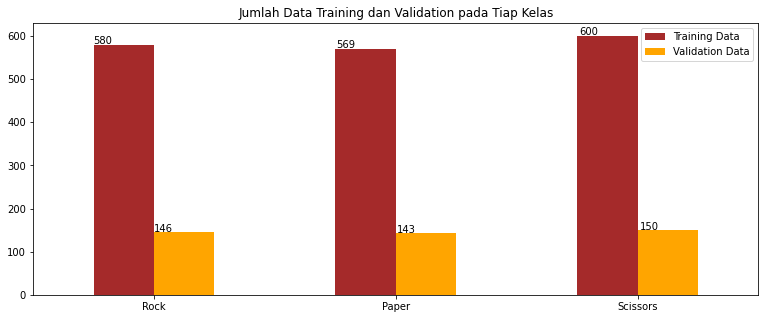

In [19]:
# visualisasi jumlah data training dan data validation
tr = [jmltrainrock, jmltrainpaper, jmltrainsci]
va = [jmlvalrock, jmlvalpaper, jmlvalsci]
index = ['Rock', 'Paper', 'Scissors']
data_am = pd.DataFrame({'Training Data': tr, 'Validation Data': va}, index=index)
ax = data_am.plot.bar(rot=0, color=['brown', 'orange'], figsize=(13,5))
ax.set_title("Jumlah Data Training dan Validation pada Tiap Kelas")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [20]:
# membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [21]:
# menggunakan image data generator pada data training dan data validation
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [22]:
# membangun model Convolutional Neural Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'sigmoid')
])

In [23]:
# melihat ringkasan dari model CNN yang telah dibangun
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [24]:
# menggunakan callback yang akan menghentikan training apabila akurasi sudah mencapai 97%
accuracythreshold = 97e-2
class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nMencapai akurasi %2.2f%% , training dihentikan!" %(accuracythreshold*100))   
          self.model.stop_training = True

In [25]:
# mengcompile model Convolutional Neural Network
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [26]:
# training model Convolutional Neural Network
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[AccCallback()])

Epoch 1/20
25/25 - 37s - loss: 1.1262 - accuracy: 0.3904 - val_loss: 1.0560 - val_accuracy: 0.3625
Epoch 2/20
25/25 - 37s - loss: 0.9576 - accuracy: 0.5562 - val_loss: 0.8339 - val_accuracy: 0.6125
Epoch 3/20
25/25 - 36s - loss: 0.6365 - accuracy: 0.7731 - val_loss: 0.4777 - val_accuracy: 0.8125
Epoch 4/20
25/25 - 36s - loss: 0.3720 - accuracy: 0.8606 - val_loss: 0.2803 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 37s - loss: 0.3886 - accuracy: 0.8612 - val_loss: 0.3065 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 37s - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2202 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 37s - loss: 0.2694 - accuracy: 0.9125 - val_loss: 0.2113 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 36s - loss: 0.1932 - accuracy: 0.9354 - val_loss: 0.5432 - val_accuracy: 0.8188
Epoch 9/20
25/25 - 36s - loss: 0.2101 - accuracy: 0.9176 - val_loss: 0.3165 - val_accuracy: 0.8813
Epoch 10/20
25/25 - 36s - loss: 0.2153 - accuracy: 0.9227 - val_loss: 0.1483 - val_accuracy: 0.9500
Epoch 11/

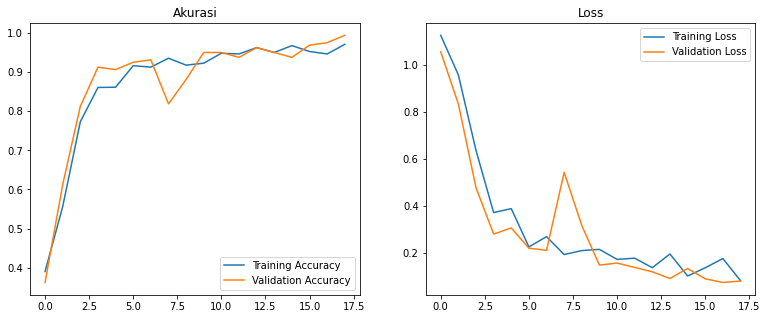

In [27]:
# visualisasi akurasi dan loss pada model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


Saving 3hIcgfPOoWEIs16j.png to 3hIcgfPOoWEIs16j.png
Saving 2affjOmZChc9AXpR.png to 2affjOmZChc9AXpR.png
Saving 5RvFm2PYoG18yIZO.png to 5RvFm2PYoG18yIZO.png
3hIcgfPOoWEIs16j.png
scissors
2affjOmZChc9AXpR.png
rock
5RvFm2PYoG18yIZO.png
paper


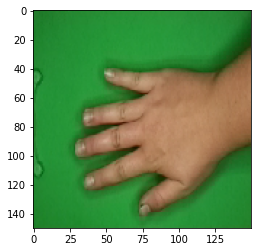

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')